## USA Accidents Exploratory Data Analysis-countrywide car accident dataset, which covers 49 states of the USA from February 2016 to Dec 2021

#### Inspiration
Can be used to study car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence

##### Questions
Questions:
- Which city in US has reported the most number of accident cases?
- Which 5 states reported the highest number of accident cases?How about per capita?
- Which timezone reported the most number of accident cases?
- Which street is most accident prone in US?
- What time of the day are accidents most frequent in?
- Which days of the week have the most accidents?
- Which months have the most accidents?
- What is the trend of accidents year over year (decreasing/increasing?)
- Effects of road condition on the accident cases.
- How did the weather conditions affected the cases?Are there more accidents inn warmer or colder areas?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
us_df=pd.read_csv('US_Accidents_Dec21_updated.csv')
us_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


### Data Preparation and Cleaning

In [3]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [4]:
us_df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [5]:
us_df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [6]:
#number of numerical columns
numerics=['int16','int32','int64','float16','float32','float64']
new_df=us_df.select_dtypes(include=numerics)
len(new_df.columns)

14

In [7]:
us_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
### missing values

In [9]:
missing_percentages=us_df.isna().sum().sort_values(ascending=False)/len(us_df)#...Number-street number
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot:>

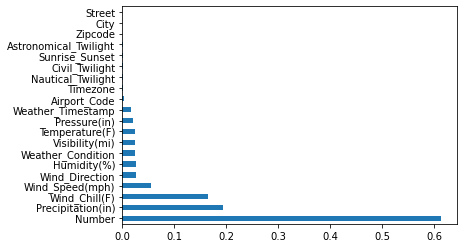

In [10]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [11]:
#remove columns with more than 50% missing values
us_df.drop('Number',axis='columns',inplace=True)

In [12]:
#remove missing values
us_df.dropna(inplace=True)

### EDA

In [79]:
#### columns to analyze
# city
# start time

#weather condition
#visibility

In [14]:
cities=us_df.City.unique()
len(cities)

9723

#### Which city in US has reported the most number of accident cases?

In [15]:
cities_by_accident=us_df.City.value_counts()
cities_by_accident

Miami            97723
Los Angeles      56471
Orlando          49691
Dallas           33052
Houston          28385
                 ...  
Byars                1
Fort Atkinson        1
Kintnersville        1
Ozone                1
Lorena               1
Name: City, Length: 9723, dtype: int64

In [16]:
cities_by_accident[:20]

Miami           97723
Los Angeles     56471
Orlando         49691
Dallas          33052
Houston         28385
Charlotte       24335
San Diego       21999
Raleigh         20932
Minneapolis     19573
Nashville       18071
Sacramento      17708
Baton Rouge     17102
Portland        16338
Austin          15288
New Orleans     15120
Saint Paul      14170
Phoenix         12994
Tucson          12343
Richmond        12238
Jacksonville    12070
Name: City, dtype: int64

<AxesSubplot:>

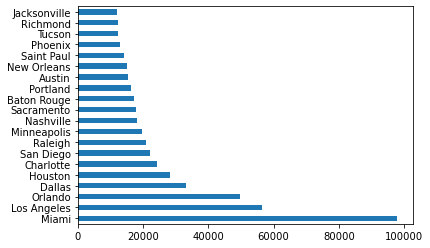

In [32]:
cities_by_accident[:20].plot(kind='barh')

Miami,Orlando,Raleign and Saint Paul are among the top in accidents yet they are not even top 40 in population size. More studies should be done to get more understanding why the number of accidents are higher in these two cities.

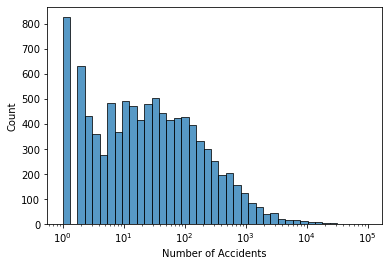

In [34]:
#distribution of accidents
sns.histplot(cities_by_accident,log_scale=True)
plt.xlabel('Number of Accidents')
plt.show()

Most cities have the number of accidents less than 1000. There are more than 800 cities that have a reported case of 1 accident in a period of 5 years(need to investigate more)

In [35]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
len(high_accident_cities)

360

In [36]:
low_accident_cities=cities_by_accident[cities_by_accident<1000]
len(low_accident_cities)

9363

### which States do these high accident cities belong to

In [17]:
city_state_accidents=us_df.groupby(['City','State'])['ID'].count().sort_values(ascending=False)[:20].reset_index()
city_state_accidents

,City,State,ID
0,Miami,FL,97684
1,Los Angeles,CA,56471
2,Orlando,FL,49657
3,Dallas,TX,32754
4,Houston,TX,28310
5,Charlotte,NC,24249
6,San Diego,CA,21999
7,Raleigh,NC,20932
8,Minneapolis,MN,19573
9,Nashville,TN,17993


In [18]:
high_accident_city_states=city_state_accidents.State.value_counts()
high_accident_city_states

CA    4
FL    3
TX    3
NC    2
LA    2
AZ    2
MN    2
OR    1
TN    1
Name: State, dtype: int64

### Which 5 states reported the highest number of accident cases?

In [24]:
states_by_accident=us_df.State.value_counts()
states_by_accident[:10]

CA    604477
FL    350204
TX    108714
OR     98754
VA     92191
PA     87882
MN     84652
NY     84591
SC     81962
NC     73930
Name: State, dtype: int64

Oregon(OR),Minessota(MN),South Carolina(SC) are not among the top 10 in population yet they are among the top 10 in accidents. More research should be done why this is so

In [37]:
Oregon_cities=us_df.loc[us_df['State']=='OR']['City']
Oregon_cities.head()

103997    Portland
104057    Portland
104058    Portland
104060    Portland
104768    Portland
Name: City, dtype: object

In [26]:
oregon_counts=Oregon_cities.value_counts().reset_index()
oregon_counts.columns=['City','count']
oregon_counts

,City,count
0,Portland,16102
1,Salem,2759
2,Pendleton,2408
3,Eugene,2148
4,Klamath Falls,1794
...,...,...
330,Bly,2
331,Portland West,2
332,Williams,1
333,Milwaukie,1


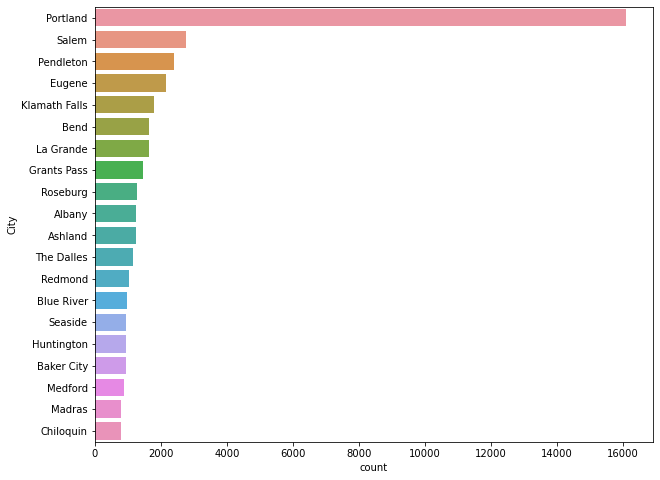

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='City',data=oregon_counts[:20])
plt.show()

Portland in Oregon city is causing the surge in accidents in that State

In [28]:
Minessota_cities=us_df.loc[us_df['State']=='MN']['City']
minessota_counts=Minessota_cities.value_counts().reset_index()
minessota_counts.columns=['City','count']
minessota_counts

,City,count
0,Minneapolis,19573
1,Saint Paul,14058
2,Hopkins,980
3,Saint Cloud,979
4,Burnsville,972
...,...,...
589,Waltham,1
590,Lewisville,1
591,Taopi,1
592,Herman,1


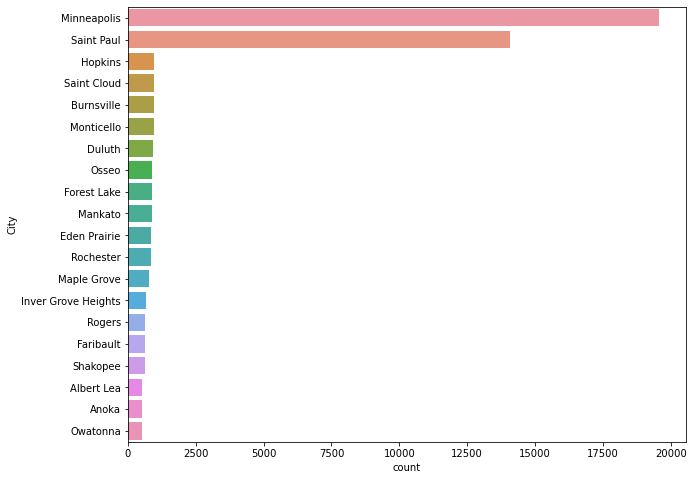

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='City',data=minessota_counts[:20])
plt.show()

Minneapolis and Saint Paul in Minessota State are causing the surge in accidents in that State

In [50]:
south_carolina_cities=us_df.loc[us_df['State']=='SC']['City']
sc_counts=south_carolina_cities.value_counts().reset_index()
sc_counts.columns=['City','count']

sc_counts

,City,count
0,Columbia,7668
1,Greenville,6142
2,Spartanburg,2824
3,Florence,2700
4,Myrtle Beach,2355
...,...,...
308,Elliott,2
309,Sheldon,1
310,Mc Clellanville,1
311,Mount Carmel,1


<Figure size 720x576 with 0 Axes>

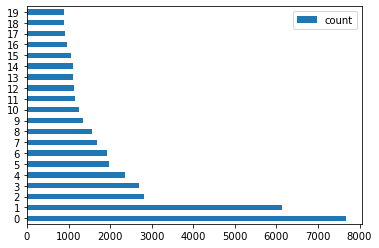

In [51]:
plt.figure(figsize=(10,8))
#sns.barplot(x='count',y='City',data=sc_counts[:20])
sc_counts[:20].plot(kind='barh')
plt.show()

Columbia and Greenville cities  in South Carolina State is causing the surge in accidents in that State

##Check the yearly trend on these cities

## Start time

In [52]:
us_df.Start_Time

0          2016-02-08 00:37:08
4          2016-02-08 07:53:43
7          2016-02-08 11:51:46
9          2016-02-08 15:16:43
10         2016-02-08 15:43:50
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2207325, dtype: object

In [53]:
#change time to datetime object
us_df.Start_Time=pd.to_datetime(us_df.Start_Time)

### Year over year trend

In [56]:
us_df.Year=us_df.Start_Time.dt.year
us_df.Year[0]

<ipython-input-56-3c6c8a3b6957>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  us_df.Year=us_df.Start_Time.dt.year


2016

In [58]:
accidents_per_year=us_df.Year.value_counts()
accidents_per_year

2021    1417339
2020     573600
2019     196132
2018       9294
2017       7490
2016       3470
Name: Start_Time, dtype: int64

<AxesSubplot:>

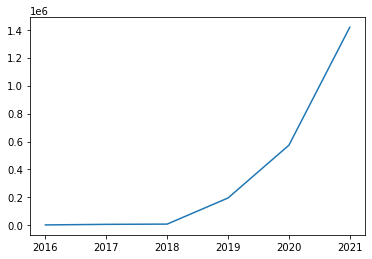

In [60]:
accidents_per_year.plot()

The total number of accidents have been going up yearly

### Which month are accidents?

In [61]:
us_df.Month=us_df.Start_Time.dt.month
us_df.Month[0]

<ipython-input-61-86595f20aa48>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  us_df.Month=us_df.Start_Time.dt.month


2

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

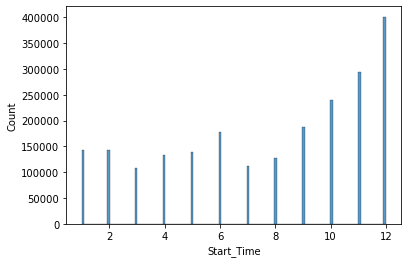

In [62]:
sns.histplot(us_df.Month)

### Which days of the week have the most accidents?

C:\Users\bibi ya chief\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

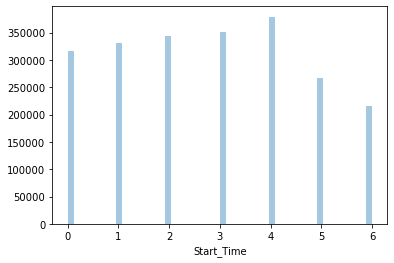

In [74]:
sns.distplot(us_df.Start_Time.dt.dayofweek,kde=False)

Accidents increase slightly from Monday to Friday(0-5) then decline on the weekend.As the workdays go from Monday to Friday, maybe people lose more focus on the road from work exhaustion

### Distribution of accidents by hour

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

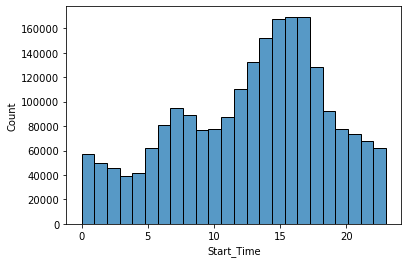

In [67]:
sns.histplot(us_df.Start_Time.dt.hour,bins=24)

There is a surge of accidents from 5a.m to 8 a.m, probably from people being in a hurry to get to work.
An even higher surge happens from 12 pm to 5 pm.Maybe people already start leaving work from 12 and the accidents increase as more people leave work until 5p.m

In [ ]:
### Distribution of accidents during weekend(Sunday)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

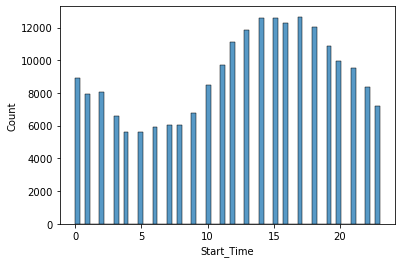

In [76]:
sunday_accidents=us_df.Start_Time[us_df.Start_Time.dt.dayofweek==6]
sns.histplot(sunday_accidents.dt.hour)

Most accidents are during the afternoon and early evening(12-18), probably from people travelling for entertainment or shopping

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

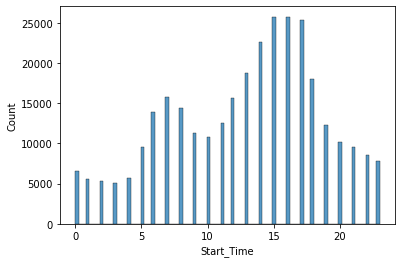

In [78]:
monday_accidents=us_df.Start_Time[us_df.Start_Time.dt.dayofweek==0]
sns.histplot(monday_accidents.dt.hour)

The weekdays accident trend is for early morning and afternoon

## Visibility

In [97]:
accidents_by_visibility=us_df['Visibility(mi)'].astype('str').value_counts()
accidents_by_visibility[:12]

10.0    1766843
7.0       61696
9.0       56574
8.0       45690
5.0       43120
6.0       40337
2.0       40318
4.0       37439
3.0       36327
1.0       35235
0.25      10829
0.5       10260
Name: Visibility(mi), dtype: int64

<AxesSubplot:ylabel='Visibility(mi)'>

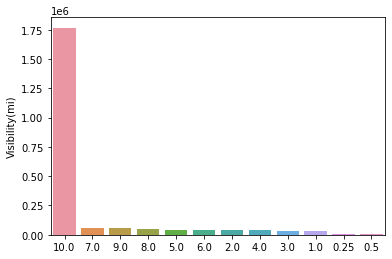

In [98]:
sns.barplot(x=accidents_by_visibility[:12].index,y=accidents_by_visibility[:12])

The plot shows that most of the accidents occurred when visibility was high, which means that visibility is not a significant concern when it comes to accidents. It means low visibility is not the only weather factor.

In [125]:
accidents_by_weather=us_df['Weather_Condition'].value_counts()
accidents_by_weather[:20]

Fair                       1042415
Cloudy                      334793
Mostly Cloudy               285317
Partly Cloudy               195367
Light Rain                  106754
Light Snow                   40157
Fog                          37214
Haze                         29095
Rain                         24802
Fair / Windy                 14483
Heavy Rain                    9847
Thunder in the Vicinity       6739
Cloudy / Windy                6532
T-Storm                       6338
Mostly Cloudy / Windy         6183
Smoke                         5971
Thunder                       5922
Light Drizzle                 5696
Light Rain with Thunder       5218
Snow                          4635
Name: Weather_Condition, dtype: int64

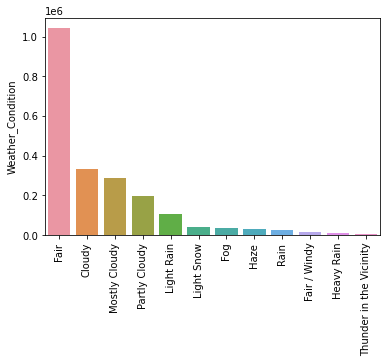

In [102]:
plt.xticks(rotation=90)
sns.barplot(x=accidents_by_weather[:12].index,y=accidents_by_weather[:12])
plt.show()

The plot depicts that the weather condition for most of the accidents was Fair, followed by cloudy and mostly cloudy.Cloudy are reasonable factors for accidents unlike Fair, which means that weather conditions also does not play an important role

## Road Conditions

In [110]:
road_conditions=us_df.loc[:,'Bump':'Turning_Loop']
road_conditions.head()

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
road_conditions_sum=road_conditions.sum().sort_values(ascending=False)
road_conditions_sum

Traffic_Signal     213116
Junction           183444
Crossing           170607
Station             59373
Stop                42969
Railway             17898
Give_Way             5318
No_Exit              3577
Traffic_Calming      1473
Bump                  908
Roundabout            101
Turning_Loop            0
dtype: int64

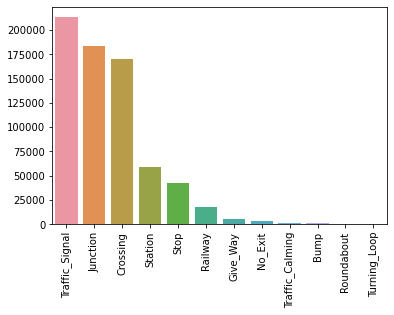

In [117]:
plt.xticks(rotation=90)
sns.barplot(x=road_conditions_sum.index,y=road_conditions_sum)
plt.show()

Most accidents happen at a traffic signal, junction and at a crossing. Could be from lack of proper knowlegde on how to observe and interprete traffic signals, lack of knowlegdge of drivimng at a crossing or junction. Maybe ask driving schools to concentrate more on making learners understand the importance of these three things

## Severity by day of week

In [128]:
df=us_df.loc[:,['Severity','Start_Time']]
df.head()

,Severity,Start_Time
0,3,2016-02-08 00:37:08
4,3,2016-02-08 07:53:43
7,2,2016-02-08 11:51:46
9,2,2016-02-08 15:16:43
10,2,2016-02-08 15:43:50


<AxesSubplot:xlabel='Start_Time', ylabel='count'>

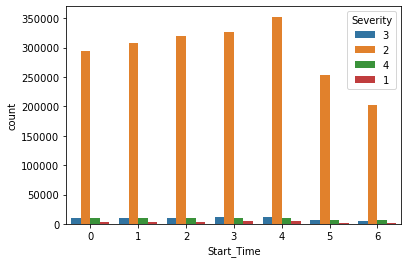

In [133]:
sns.countplot(x=df.Start_Time.dt.dayofweek,hue=df.Severity.astype('str'))